# Chapter 9 Practice Problems

In [1]:
import pandas as pd
import io
import requests
from IPython.core.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
%load_ext rpy2.ipython

pd.options.display.max_columns = 50

## Dentistry

**In a study, 28 adults with mild periodontal disease are assessed before and 6 months after implementation of a dental-education program intended to promote better oral hygiene. After 6 months, periodontal status improved in 15 patients, declined in 8, and remained the same in 5.**

**Q9.1: Assess the impact of the program statistically (use a two-sided test).**

In [6]:
count = 15
nobs = 15 + 8
value = 0.5

In [32]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count, nobs, value, alternative='two-sided', prop_var=False)

(1.5322913125990982, 0.12545056393044116)

In [33]:
%%R -i count,nobs,value
prop.test(x=count, n=nobs, p=value, alternative="two.sided", conf.level=0.95, correct=TRUE)


	1-sample proportions test with continuity correction

data:  count out of nobs, null probability value
X-squared = 1.5652, df = 1, p-value = 0.2109
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.4282115 0.8281042
sample estimates:
        p 
0.6521739 



Result is not statistically significant, based on the p-value determined from a Sign Test, meaning we fail to reject H0 and accept H1: that the dental-education program had no statistically significant effect on periodontal status. 

**Suppose patients are graded on the degree of change in periodontal status on a 7-point scale, with +3 indicating the greatest improvement, 0 indicating no change, and −3 indi- cating the greatest decline. The data are given in Table 9.9.**

**9.2 What nonparametric test can be used to determine whether a significant change in periodontal status has occurred over time?**

The data is ordinal (relation between the numbers is not defined) and paired (each patient serves as their own control), we can use the Wilcoxon Signed-Rank test. 

**9.3 Implement the procedure in Problem 9.2, and report a p-value.**

In [8]:
d = [3,3,3,3, 2,2,2,2,2, 1,1,1,1,1,1, 0,0,0,0,0, -1,-1,-1,-1, -2,-2, -3,-3]

In [9]:
from scipy.stats import wilcoxon
wilcoxon(d, y=None, zero_method='wilcox', correction=True, alternative='two-sided')

WilcoxonResult(statistic=91.0, pvalue=0.1510863057082222)

**9.4 Suppose there are two samples of size 6 and 7, with a rank sum of 58 in the sample of size 6. Using the Wilcoxon rank-sum test, evaluate the significance of the results, assum- ing there are no ties.**

In [34]:
n1 = 6
n2 = 7

In [46]:
R1 = 58

In [49]:
print(n1*(n1 + n2 + 1)/2)
print(R1 == n1*(n1 + n2 + 1)/2)

42.0
False


R1 != 42.0, so T != 0. 
Since there are no ties we can use Equation 9.8 -> 3.a

In [38]:
# I'm not going to do the computation, I got this from chegg solutions
T = 2.143

If T > z<sub>1-alpha/2</sub>, then reject H0, otherwise accept H0.

In [39]:
alpha = 0.05

In [41]:
1 - alpha/2

0.975

In [44]:
z = scipy.stats.norm.ppf(.95)
z

1.6448536269514722

In [45]:
T > z

True

Since T > z, we can reject the null hypothesis that there are no differences between the two samples. 

## Health Services Administration

**Suppose we want to compare the length of hospital stay for patients with the same diagnosis at two different hospitals. The results are shown in Table 9.10.**

**9.7 Why might a t test not be very useful in this case?**

Distribution isn't normal and the sample size is low so we can't assume CLT holds here. 

**9.8 Carry out a nonparametric procedure for testing the
hypothesis that lengths of stay are comparable in the two hospitals.**

In [50]:
x = [21, 10, 32, 60, 8, 44, 29, 5, 13, 26, 33]
y = [86, 27, 10, 68, 87, 76, 125, 60, 35, 73, 96, 44, 238]

In [51]:
from scipy.stats import mannwhitneyu
mannwhitneyu(x, y, use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=17.5, pvalue=0.0019245921105493311)

So the distributions of the lengths of stay between the two hospitals are different and statistically significant at the 95% confidence level. 

Let's try testing whether the median of the differences in the two groups is positive.

In [57]:
from scipy.stats import mannwhitneyu
mannwhitneyu(x, y, use_continuity=True, alternative='less')

MannwhitneyuResult(statistic=17.5, pvalue=0.0009622960552746656)

## Infectious Disease

**The distribution of white-blood-cell count is typically positively skewed, and assumptions of normality are usually not valid.**

**9.9 To compare the distribution of white-blood-cell counts of patients on the medical and surgical services in Table 2.13 (p. 36), or in HOSPITAL.DAT, when normality is not assumed, what test can be used?**

Wilcoxon Rank-Sun Test

**9.10 Perform the test in Problem 9.9, and report a p-value.**

In [26]:
WBC = [8,5,12,4,11,6,8,7,7,12,7,3,11,14,11,9,6,6,5,6,10,14,4,5,5]
Service = [1,1,2,2,2,2,1,1,1,2,1,2,2,2,2,2,2,2,1,2,2,2,1,2,1]
df = pd.DataFrame(data={'WBC':WBC, 'Service':Service})
df.head()

,WBC,Service
0,8,1
1,5,1
2,12,2
3,4,2
4,11,2


In [27]:
x = df.loc[df['Service']==1, 'WBC']
y = df.loc[df['Service']==2, 'WBC']

In [28]:
from scipy.stats import mannwhitneyu
mannwhitneyu(x, y, use_continuity=True, alternative='two-sided')

MannwhitneyuResult(statistic=44.0, pvalue=0.11721965949490246)

results are not significant indicating that the distributions of white blood cell counts for patients who under-went the two types of surgery are not significantly different at the 95% confidence threshold. 

## Sports Medicine

Refer to Data Set TENNIS2.DAT at www.cengagebrain.com.

**9.11 What nonparametric test can be used to compare degree of pain during maximal activity in the first period be- tween people randomized to Motrin and a placebo?**

Wilcoxon Rank-Sum test (or Mann-Whitney U test)

## Otolaryngology, Pediatrics


A common symptom of otitis media in young children is the prolonged presence of fluid in the middle ear, known as middle-ear effusion. The presence of fluid may result in tem- porary hearing loss and interfere with normal learning skills in the first 2 years of life. One hypothesis is that babies who are breastfed for at least 1 month build up some immunity against the effects of the infection and have less prolonged effusion than do bottle-fed babies. A small study of 24 pairs of babies is set up, in which the babies are matched on a one-to-one basis according to age, sex, socioeconomic status, and type of medications taken. One member of the matched pair is a breastfed baby, and the other member is a bottle-fed baby. The outcome variable is the duration of middle-ear effusion after the first episode of otitis media. The results are given in Table 9.11.

9.13 What hypotheses are being tested here?

In [75]:
# Whether the distributions of the length of time of middle-ear effusion are the 
# same in breast-fed babies vs. bottle-fed babies populations.

*9.14 Why might a nonparametric test be useful in testing
the hypotheses?

The data is cardinal, but if the sample size is small and the (underlying) distributed is not normal, then a non-parametric test may be more appropriate. 

In [76]:
# n < 30, so I'd say we can't use parametric tests.

# is the underlying distribution normal?

*9.15 Which nonparametric test should be used here?

Well the data is paired because A) they told us so in the prompt but also B) they've matched babies on a one-to-one basis in order to attempt to normalize for several possible confounding effects (age, sex, socioeconomic status, type of medicatinos taken).

*9.16 Test the hypothesis that the duration of effusion is different among breastfed babies than among bottle-fed babies using a nonparametric test.

In [60]:
x = [20,11,3,24,7,28,58,7,39,17,17,12,52,14,12,30,7,15,65,10,7,19,34,25]
y = [18,35,7,182,6,33,223,7,57,76,186,29,39,15,21,28,8,27,77,12,8,16,28,20]

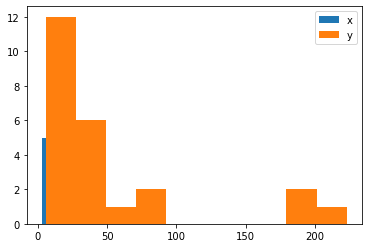

In [67]:
plt.hist(x, label='x');
plt.hist(y, label='y');
plt.legend();

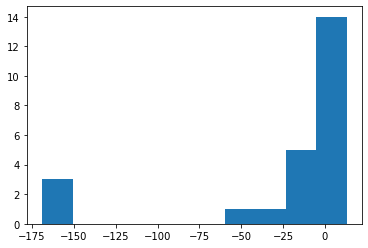

In [70]:
d = [x-y for x,y in zip(x, y)]
plt.hist(d);

In [72]:
np.median(d)

-3.0

If we look at the distribution of differences, the median is below 0, suggesting that x < y.

In [62]:
# So the Wilcoxon Signed-Rank test is appropriate here
scipy.stats.wilcoxon(x, y, zero_method='wilcox', correction=True, alternative='two-sided')

WilcoxonResult(statistic=61.0, pvalue=0.019864400334025825)

Since p < 0.05, we can reject the null hypothesis and accept H1: that there is a difference in the middle-ear effusion length among the two populations of babies. 

Q: Which population (breast-fed or bottle-fed) has a larger median effusion duration?

In [73]:
scipy.stats.wilcoxon(x, y, zero_method='wilcox', correction=True, alternative='less')

WilcoxonResult(statistic=61.0, pvalue=0.009932200167012913)

It appears the breast fed population of babies likely has a lower duration of middle-ear effusion than the bottle-fed.

## Hypertension
Polyunsaturated fatty acids in the diet favorably affect several risk factors for cardiovascular disease. The principal dietary polyunsaturated fat is linoleic acid. To test the effects of dietary supplementation with linoleic acid on blood pressure, 17 adults consumed 23 g/day of safflower oil, high in linoleic acid, for 4 weeks. Systolic blood pressure (SBP) measurements were taken at base- line (before ingestion of oil) and 1 month later, with the mean values over several readings at each visit given in Table 9.12.

9.17 What parametric test could be used to test for the effect of linoleic acid on SBP?

Paired t-Test

9.18 Perform the test in Problem 9.17, and report a p-value.

In [104]:
x = [119.67,100.00,123.56,109.89,96.22,133.33,115.78,126.39,122.78,117.44,111.33,117.33,120.67,131.67,92.39,134.44,108.67]
y = [117.33,98.78,123.83,107.67,95.67,128.89,113.22,121.56,126.33,110.39,107.00,108.44,117.00,126.89,93.06,126.67,108.67]

In [106]:
len(x)

17

In [107]:
len(y)

17

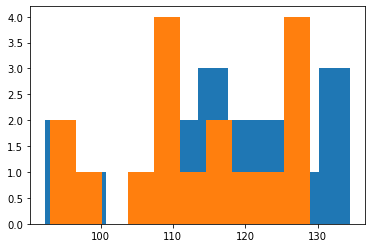

In [105]:
plt.hist(x);
plt.hist(y);

In [103]:
from scipy.stats import ttest_rel
ttest_rel(x, y)

Ttest_relResult(statistic=3.720351086186377, pvalue=0.0018606612827389327)

9.19 What nonparametric test could be used to test for the effect of linoleic acid on SBP?

Wilcoxon Signed-Rank test

9.20 Perform the test in Problem 9.19, and report a p-value.

In [101]:
wilcoxon(x, y)

WilcoxonResult(statistic=12.0, pvalue=0.003783246451258581)

9.21 Compare your results in Problems 9.18 and 9.20, and discuss which method you feel is more appropriate here.

INteresting that the paired t-test has a lower p-value (factor of 3) although both the parametric and non-parametric tests give significant results. 

Well, the data is blood pressure measurements, which is cardinal data, so based on that alone, either test is appropriate. However the wilcoxon signed-rank test is more appropriate when we have reason to suspect that the underlying distribution of data (blood pressure measurements) is not normally distributed. Perhaps the population we're looking at is not a truly random sample, and so the poulation distribution of blood pressure measurements is skewed.

And since 30 seems to be the general cutoff for the assumption that the CLT holds (according to https://www.investopedia.com/terms/c/central_limit_theorem.asp#:~:text=Understanding%20the%20Central%20Limit%20Theorem%20(CLT)&text=As%20a%20general%20rule%2C%20sample,means%20is%20fairly%20normally%20distributed), and our sample size is 17, it is probably safer to go with the non-parametric method.

However in this case, we have highly significant results either way. 

## Hypertension
An instrument that is used in some blood-pressure stud- ies is the random-zero device, in which the zero point of the machine is randomly set with each use and the observer is not aware of the actual level of blood pressure at the time of measurement. This instrument is intended to reduce observer bias. Before using such a machine, it is important to check that readings are, on average, comparable to those of a standard cuff. For this purpose, two measurements were made on 20 children with both the standard cuff and the random-zero machine. The mean systolic blood pressure (SBP) for the two readings for each machine are given in Table 9.13. Suppose observers are reluctant to assume that the distribution of blood pressure is normal.

In [77]:
x = [79,112,103,104,94,106,103,97,88,113,98,103,105,117,94,88,101,98,91,105]
y = [84,99,92,103,94,106,97,108,77,94,97,103,107,120,94,87,97,93,87,104]

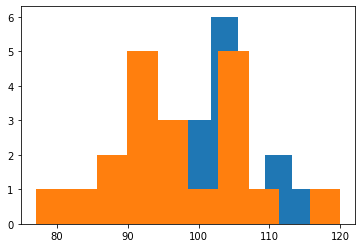

In [91]:
plt.hist(x);
plt.hist(y);

1.0

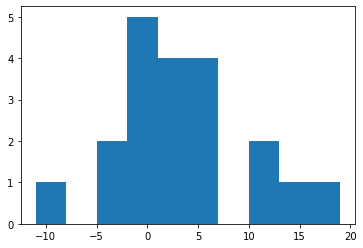

In [87]:
d = [x - y for x,y in zip(x, y)]
plt.hist(d)
np.median(d)

In [82]:
len(x)

20

*9.22 Which nonparametric test should be used to test the hypothesis that the mean SBPs for the two machines are comparable?

Signed-Rank test (since data are paired).

*9.23 Conduct the test recommended in Problem 9.22.

In [85]:
wilcoxon(x, y, correction=True)

WilcoxonResult(statistic=33.5, pvalue=0.07793121061256209)

not significant results at the 5% significance level.